In [ ]:
!pip install opencv-python numpy matplotlib


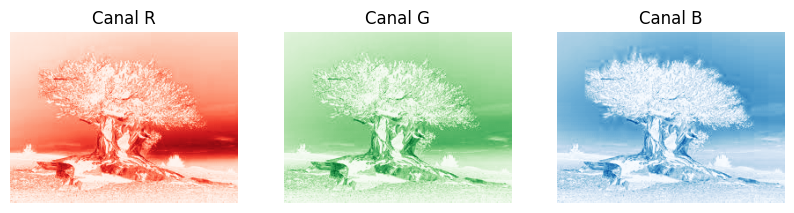

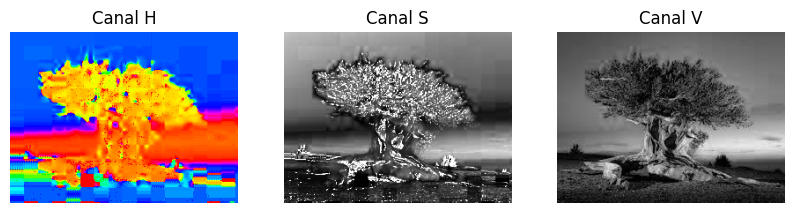

Imagen modificada:


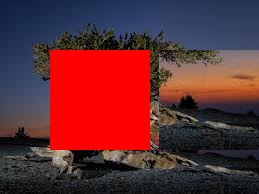

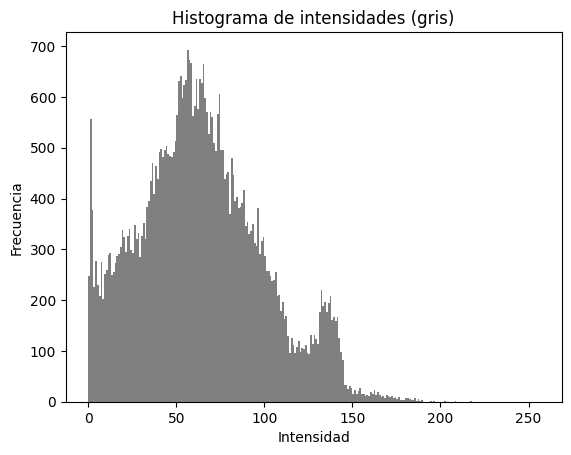

Imagen con brillo y contraste ajustado:


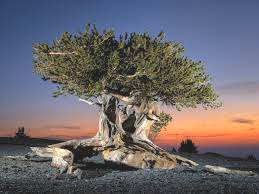

Ajuste interactivo de brillo y contraste:


interactive(children=(IntSlider(value=50, description='alpha', max=150, min=10), IntSlider(value=100, descript…

<function __main__.ajustar_brillo_contraste(alpha=50, beta=100)>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Cargar imagen en color
img = cv2.imread('/content/abol.jpeg')  # Cambia por el nombre real de tu imagen
if img is None:
    raise FileNotFoundError("No se encontró la imagen.")

# Convertir de BGR a RGB y HSV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Mostrar canales RGB
r, g, b = cv2.split(img_rgb)
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Canal R')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Canal G')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Canal B')
plt.axis('off')
plt.show()

# Mostrar canales HSV
h, s, v = cv2.split(img_hsv)
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Canal H')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Canal S')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Canal V')
plt.axis('off')
plt.show()

# Clonar la imagen para modificarla
img_mod = img.copy()

# Cambiar color de un área rectangular a rojo (BGR)
img_mod[50:150, 50:150] = [0, 0, 255]

# Asegurarse que la región a copiar no se pase de los límites
h_img, w_img = img.shape[:2]
roi_size = 100

# Coordenadas seguras para la región origen
x1, y1 = min(200, h_img - roi_size), min(200, w_img - roi_size)
x2, y2 = x1 + roi_size, y1 + roi_size

# Coordenadas destino seguras
dx1, dy1 = min(50, h_img - roi_size), min(300, w_img - roi_size)
dx2, dy2 = dx1 + roi_size, dy1 + roi_size

# Copiar región
roi = img[x1:x2, y1:y2]
img_mod[dx1:dx2, dy1:dy2] = roi

# Mostrar imagen modificada
print("Imagen modificada:")
cv2_imshow(img_mod)

# Calcular y mostrar histograma en escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('Histograma de intensidades (gris)')
plt.hist(gray.ravel(), bins=256, range=[0,256], color='gray')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

# Ajuste de brillo y contraste
alpha = 1.2  # contraste
beta = 30    # brillo
bright_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

print("Imagen con brillo y contraste ajustado:")
cv2_imshow(bright_contrast)

# BONUS: sliders interactivos en Google Colab con widgets
from ipywidgets import interact, IntSlider

def ajustar_brillo_contraste(alpha=50, beta=100):
    a = alpha / 50.0
    b = beta - 100
    result = cv2.convertScaleAbs(img, alpha=a, beta=b)
    print(f"Contraste (alpha): {a:.2f} | Brillo (beta): {b}")
    cv2_imshow(result)

print("Ajuste interactivo de brillo y contraste:")
interact(ajustar_brillo_contraste,
         alpha=IntSlider(min=10, max=150, step=1, value=50),
         beta=IntSlider(min=0, max=200, step=1, value=100))
